In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../datasets/Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
# crim = per capita crime rate by town
# zn - proportion of residential land zoned for lots over 25000 sq ft
# indus - proportion of non retail business acres per town
# chas- charles river dummy variable 1. if trackt bounds rover
# NOX - nitric oxide concentration parts per 10 million
# RM - average number of rooms per dwelling
# AGE - proportion of owner occupied units built prior to 1940
# DIS - weighted distances to five boston employment centers
# RAD -index of accessibility to radial highways
# TAX- full value property tax rate per 10000$
# PTRatio : people teacher ratio bytown
# black : proportion of blacks by town
# lstat: %lower status of the population


df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

# EDA:  correlation

In [7]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
corr_matrix=df.corr()
corrdf = corr_matrix["medv"].sort_values(ascending=False)

<BarContainer object of 14 artists>

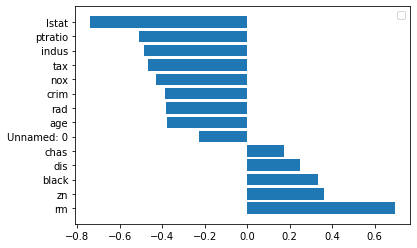

In [19]:
import matplotlib.pyplot as plt
dfplot = corrdf.to_frame().drop('medv')
# do plot specifics
plt.legend('')
plt.barh(dfplot.index, dfplot['medv'])
# corrdf.to_frame().drop('medv').plot.barh()

<AxesSubplot: >

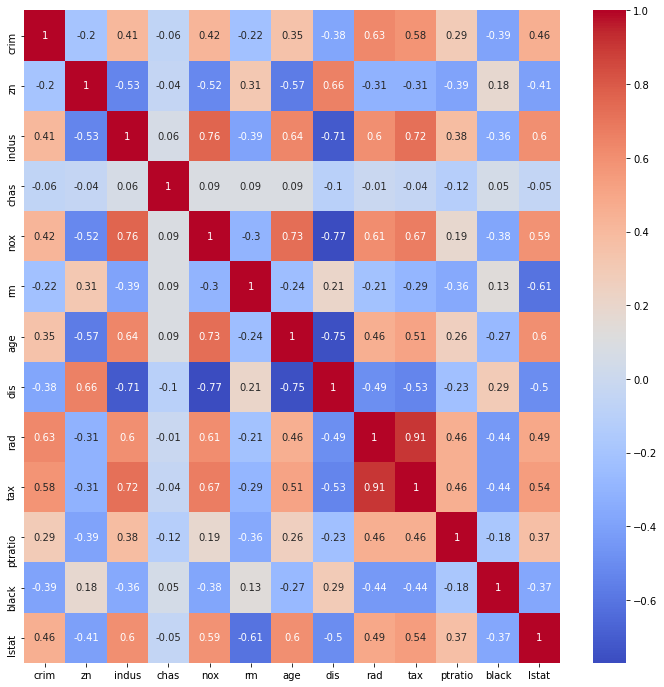

In [28]:
import seaborn as sns
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat']
bos_1 = df[features]
plt.figure(figsize=(12,12))
correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True,cmap='coolwarm')

<AxesSubplot: xlabel='medv', ylabel='Density'>

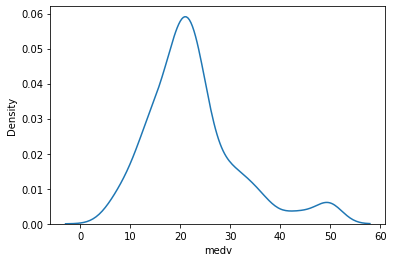

In [35]:
sns.kdeplot(data=df, x="medv")

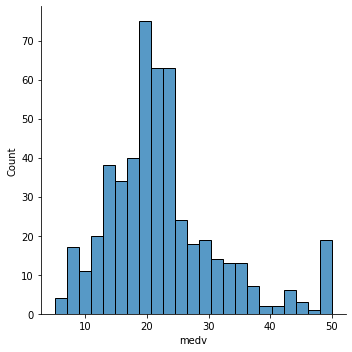

In [37]:
sns.displot(df, x="medv")

<AxesSubplot: xlabel='medv', ylabel='Count'>

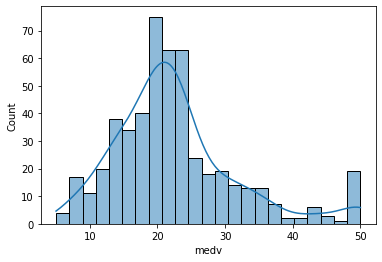

In [39]:
  sns.histplot(data=df, x='medv', kde = True)

In [40]:
df['Quantile_rank'] = pd.qcut(df['medv'], 4,
                               labels = False)

<AxesSubplot: xlabel='Quantile_rank', ylabel='medv'>

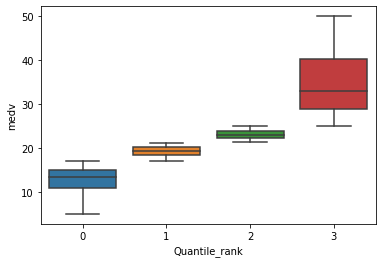

In [42]:
sns.boxplot(x='Quantile_rank', y='medv', data=df)

<AxesSubplot: xlabel='Quantile_rank', ylabel='crim'>

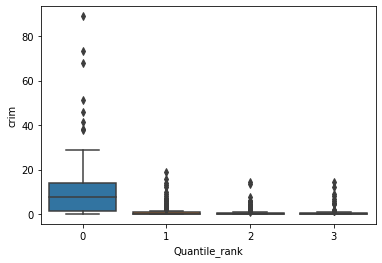

In [43]:
sns.boxplot(x='Quantile_rank', y='crim', data=df)

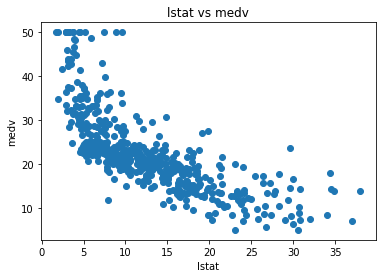

In [60]:
import matplotlib.pyplot as plt

x = df['lstat']
y = df['medv']

plt.title("lstat vs medv")
plt.xlabel("lstat")
plt.ylabel("medv")
plt.scatter(x, y)

# split to train test

select 80% of observations in random and build a regression model
Predict the price of boston housing dataset

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'ptratio', 'black', 'lstat']]
Y = df[["medv"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 12)
(102, 12)
(404, 1)
(102, 1)


# Fit the model

In [77]:

import statsmodels.api as sm
# adding the constant term
X_train = sm.add_constant(X_train)
 
# performing the regression
# and fitting the model
olsmodel = sm.OLS(y_train, X_train).fit()

In [78]:
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     89.22
Date:                Sun, 26 Mar 2023   Prob (F-statistic):          6.02e-104
Time:                        11:59:55   Log-Likelihood:                -1206.4
No. Observations:                 404   AIC:                             2439.
Df Residuals:                     391   BIC:                             2491.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9313      5.792      6.204      0.000      24.544      47.318
crim          -0.1308      0.037     -3.568      0.000      -0.203      -0.059
zn             0.0384      0.015      2.479      0.014       0.008       0.069
indus         -0.0912      0.066     -1.383      0.167      -0.221       0.038
chas           3.0894      0.990      3.122      0.002       1.144       5.035
nox          -17.1498      4.543     -3.775      0.000     -26.082      -8.218
rm             3.5197      0.473      7.440      0.000       2.590       4.450
age           -0.0002      0.015     -0.016      0.987      -0.029       0.029
dis           -1.5055      0.235     -6.396      0.000      -1.968      -1.043
rad            0.1797      0.048      3.727      0.000       0.085       0.274
ptratio       -0.9811      0.150     -6.555      0.000      -1.275      -0.687
black          0.0120      0.003      3.844      0.000       0.006       0.018
lstat         -0.5877      0.058    -10.069      0.000      -0.702      -0.473
==============================================================================
Omnibus:                      127.394   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.791
Skew:                           1.363   Prob(JB):                    1.20e-106
Kurtosis:                       7.642   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
X_test = sm.add_constant(X_test) # add again the constant
y_test_predict = olsmodel.predict(X_test) # use the predict method of the object

In [80]:
https://thomasleeper.com/Rcourse/Tutorials/olscoefplot.html

SyntaxError: invalid syntax (<ipython-input-80-2e9c493b617d>, line 1)

In [ ]:
https://medium.com/analytics-vidhya/create-your-own-coefficient-plot-function-in-python-aadb9fe27a77

In [ ]:
import numpy as np
params = model.params
conf = model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
# convert log odds to ORs
odds = pd.DataFrame(np.exp(conf))
# check if pvalues are significant
odds['pvalues'] = model.pvalues
odds['significant?'] = ['significant' if pval <= 0.05 else 'not significant' for pval in model.pvalues]
odds

In [83]:
# Define function to output plot of the model coefficients

def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    return plt.show()

<ipython-input-83-7073bb609ecf>:65: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


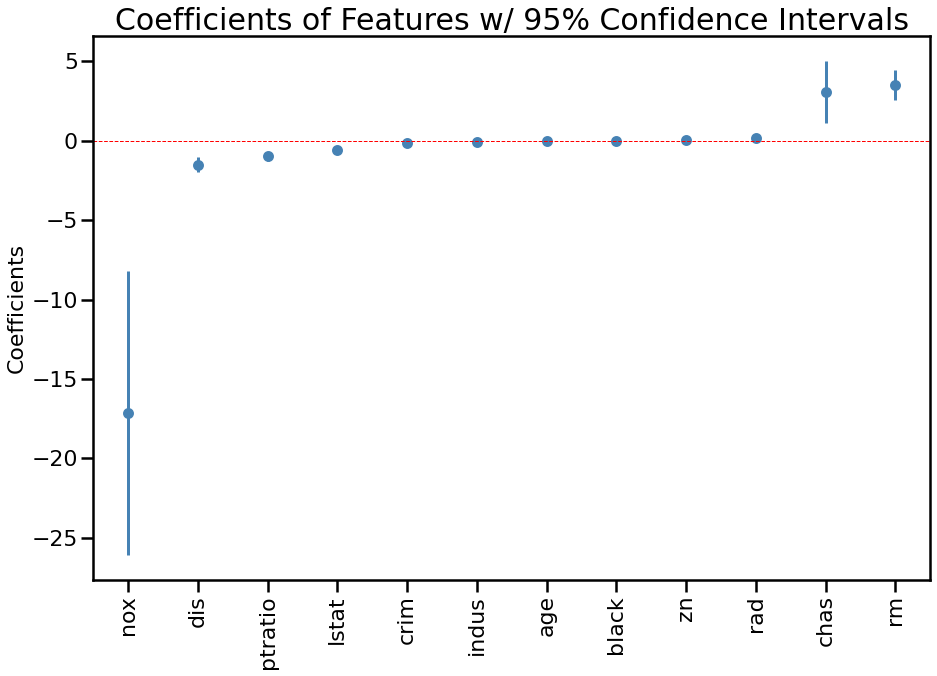

In [84]:
# Plot coefficients w/95% confidence intervals for Model

coefplot(olsmodel)

# model results

In [87]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# model evaluation for training set
y_train_predict = olsmodel.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
mae = mean_absolute_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Mean absolute err is {}'.format(mae))
print('R2 score is {}'.format(r2))
print("\n")



The model performance for training set
--------------------------------------
RMSE is 4.793619102993926
Mean absolute err is 3.3825971630382443
R2 score is 0.7324990686380535




In [88]:
# model evaluation for testing set
y_test_predict = olsmodel.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
mae = mean_absolute_error(y_test, y_test_predict)
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Mean absolute err is {}'.format(mae))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.60120713513852
Mean absolute err is 3.305304539060765
R2 score is 0.729594316249762


# dropping insignificant variables

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X = df[['crim', 'zn',  'chas', 'nox', 'rm',  'dis',
       'rad', 'ptratio', 'black', 'lstat']]
Y = df[["medv"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 10)
(102, 10)
(404, 1)
(102, 1)


In [95]:

import statsmodels.api as sm
# adding the constant term
X_train = sm.add_constant(X_train)
 
# performing the regression
# and fitting the model
olsmodel = sm.OLS(y_train, X_train).fit()

In [96]:
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     106.9
Date:                Sun, 26 Mar 2023   Prob (F-statistic):          1.45e-105
Time:                        12:19:49   Log-Likelihood:                -1207.4
No. Observations:                 404   AIC:                             2437.
Df Residuals:                     393   BIC:                             2481.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0027      5.780      6.228      0.000      24.638      47.367
crim          -0.1292      0.037     -3.527      0.000      -0.201      -0.057
zn             0.0386      0.015      2.514      0.012       0.008       0.069
chas           2.9787      0.985      3.025      0.003       1.043       4.915
nox          -19.2623      4.150     -4.641      0.000     -27.422     -11.103
rm             3.6102      0.460      7.850      0.000       2.706       4.514
dis           -1.4310      0.218     -6.566      0.000      -1.859      -1.003
rad            0.1698      0.048      3.571      0.000       0.076       0.263
ptratio       -1.0193      0.147     -6.947      0.000      -1.308      -0.731
black          0.0123      0.003      3.942      0.000       0.006       0.018
lstat         -0.5924      0.055    -10.840      0.000      -0.700      -0.485
==============================================================================
Omnibus:                      124.985   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.564
Skew:                           1.344   Prob(JB):                    4.86e-102
Kurtosis:                       7.526   Cond. No.                     9.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-83-7073bb609ecf>:65: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


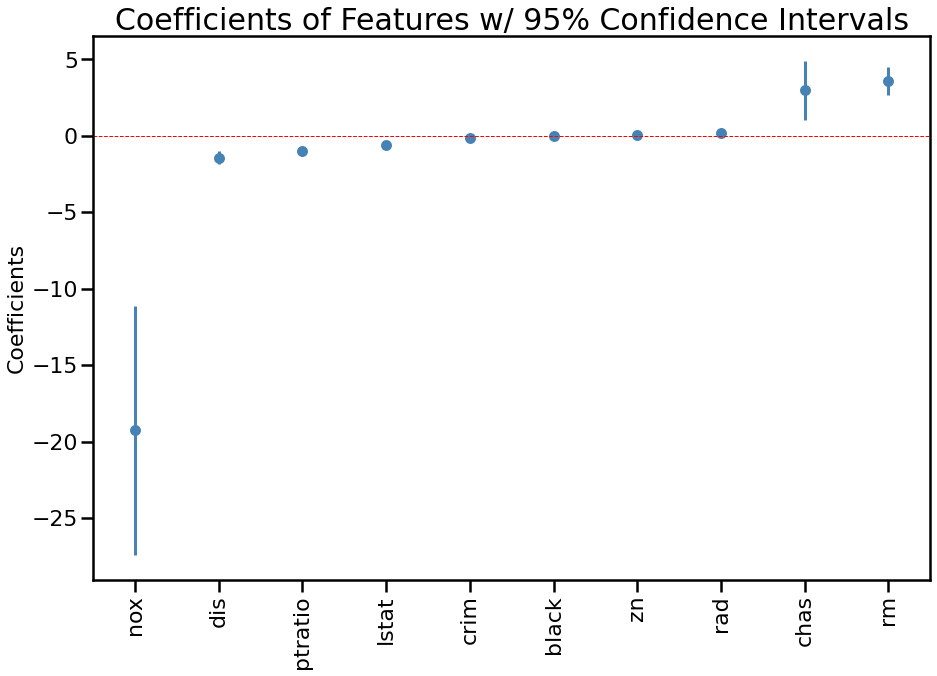

In [97]:
coefplot(olsmodel)

# inspect the residuals

In [89]:
#https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html

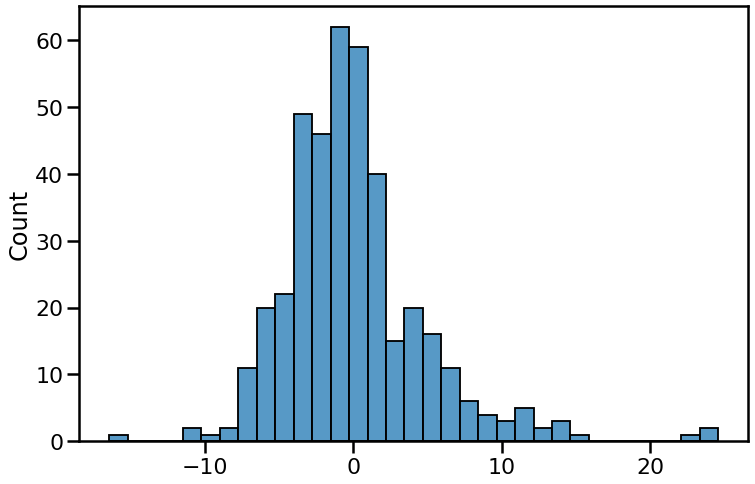

In [104]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(olsmodel.resid, ax=ax);

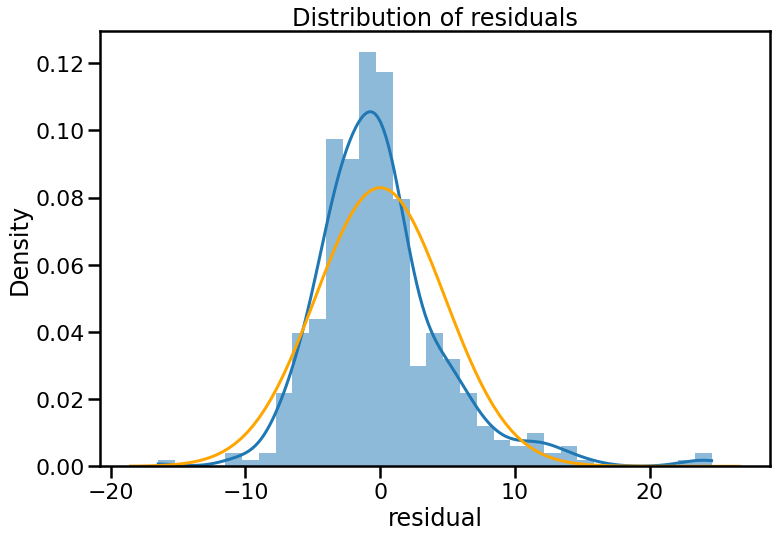

In [111]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
mu, std = stats.norm.fit(olsmodel.resid)


fig, ax = plt.subplots(figsize=(12, 8))
# plot the residuals
sns.histplot(x=olsmodel.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

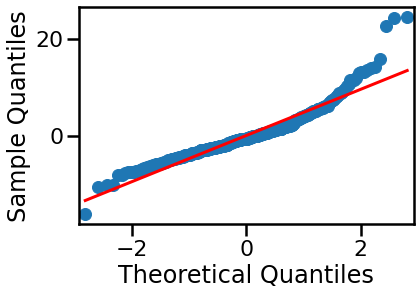

In [92]:
sm.qqplot(olsmodel.resid, line='s');

In [107]:
residuals = olsmodel.resid

residuals.mean()

-1.209153789195715e-13

In [108]:
residuals.std()

4.811292583865872

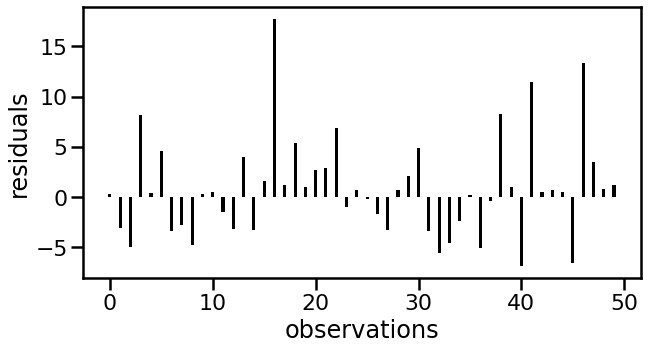

In [93]:
import matplotlib.pyplot as plt
performance = pd.DataFrame({'PREDICTIONS': y_test_predict.values, 'ACTUAL VALUES':y_test["medv"].values})
performance.head()
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

#preparing data for plotting
performance.reset_index(drop=True, inplace=True) #inplace turns into a column
performance.reset_index(inplace=True)
performance.head()

#plot the residuals
fig = plt.figure(figsize=(10,5))
plt.bar('index', 'error', data=performance[:50], color='black', width=0.3)
plt.ylabel('residuals')
plt.xlabel('observations')
plt.show()

# heteroskedasticity check with residual plot

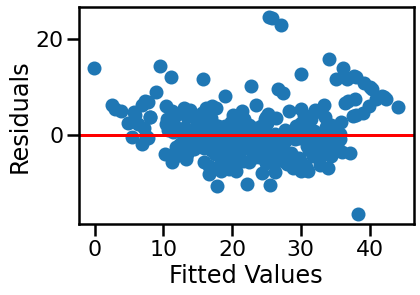

In [112]:
import matplotlib.pyplot as plt

# Plot fitted values vs. residuals to test for heteroskedasticity
plt.scatter(olsmodel.fittedvalues, olsmodel.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'r')
plt.show()

In [ ]:
# check multi-collinearity

In [113]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
#        'rad', 'tax', 'ptratio', 'black', 'lstat']
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] =  features
# X= df[features]
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(df.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = X_train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  568.689631
1      crim    1.719280
2        zn    2.206593
3      chas    1.064725
4       nox    3.848652
5        rm    1.724281
6       dis    3.409348
7       rad    2.904513
8   ptratio    1.757747
9     black    1.301599
10    lstat    2.512160
